# 1 Introdução ao processamento de imagens de satélite

!!! ATENÇÃO: INSTALAR FIONA: conda install fiona !!!

In [18]:
# Ajustando opções de visualização de plots. Se o comando for:
# %matplotlib inline
# significa que os plots serão feitos no corpo do notebook
# Se for %matplotlib
# Significa que o plot será feito num pop up!
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
# Use retina para melhorar a qualidade dos plots

In [89]:
#%% Importando biblioteca
import rasterio
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from rasterio.mask import mask
import seaborn as sns
# o comando a seguir exeibe qual o backend sendo usado
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

## 1.1 Abrindo arquivos

In [3]:
#%% Abrindo arquivos

ETM_1_arq = rasterio.open('Banda_ETM+1.tif')
ETM_2_arq = rasterio.open('Banda_ETM+2.tif')
ETM_3_arq = rasterio.open('Banda_ETM+3.tif')
"""ETM_4 = rasterio.open('Banda_ETM+4.tif')
ETM_5 = rasterio.open('Banda_ETM+5.tif')
ETM_7 = rasterio.open('Banda_ETM+7.tif')"""

# Exibindo informações básicas dos arquivos:
print(f"Informação sobre o arquivo:\n {ETM_1_arq}")

# Número de bandas no arquivo
print(f"O número de bandas neste arquivo é: {ETM_1_arq.count}")
print(f"A largura do arquivo é: {ETM_1_arq.width} colunas")
print(f"A altura do arquivo é: {ETM_1_arq.height} linhas")

#Como o arquivo é georreferenciado, vamos exibir os limites:
print(f"O bounding box do arquivo é: {ETM_1_arq.bounds}")

#Exibindo o sistema de coordenadas
print(f"O istema de coordenadas é: {ETM_1_arq.crs}")

#Para entender mais: https://epsg.org/home.html

Informação sobre o arquivo:
 <open DatasetReader name='Banda_ETM+1.tif' mode='r'>
O número de bandas neste arquivo é: 1
A largura do arquivo é: 2833 colunas
A altura do arquivo é: 1571 linhas
O bounding box do arquivo é: BoundingBox(left=430000.0, bottom=7524870.0, right=514990.0, top=7572000.0)
O istema de coordenadas é: EPSG:32722


> Note que o CRS EPSG: 32722 refere-se ao sistema WGS 84, projeção UTM, fuso 22S 

Para entender mais: https://epsg.org/home.html

## 1.2 Leitura de imagens

In [4]:
# %% Leitura de imagens
#Quantidade de bandas
print(f"A quantidade de bandas é: {ETM_1_arq.indexes}")

B1 = ETM_1_arq.read(1)
B2 = ETM_2_arq.read(1)
B3 = ETM_3_arq.read(1)

#Imprimir o tipo de dado:
print(f"O arquivo ETM_1 está no formato: {B1.dtype}")
print(f"A imagem é um numpy array do tipo: {type(B1)}")

#Exibir as dimensões da matriz e comparar com as dimensões do arquivo
print(f"Número de linhas: {B1.shape[0]}, Número de colunas: {B1.shape[1]}")

A quantidade de bandas é: (1,)
O arquivo ETM_1 está no formato: uint8
A imagem é um numpy array do tipo: <class 'numpy.ndarray'>
Número de linhas: 1571, Número de colunas: 2833


## 1.3 Acessando valores

In [5]:
# %% Acessando valores
print(f"O valor do pixel na linha 100 e coluna 200 é: {B1[100,200]}")

#Acessando as coordnadas espaciais de um dado pixel:
print(f"As coord. do pixel na linha 100 e coluna 200 são: {ETM_1_arq.xy(100,200)}")
#Note que o método é aplicado sobre o arquivo e não sobre a array numpy

#Exibindo valores mínimo e máximo da imagem:
print(f"O valor mínimo da imagem é: {B1.min()}")
print(f"O valor máximo da imagem é: {B1.max()}")

O valor do pixel na linha 100 e coluna 200 é: 73
As coord. do pixel na linha 100 e coluna 200 são: (436015.0, 7568985.0)
O valor mínimo da imagem é: 26
O valor máximo da imagem é: 246


## 1.4 Exibindo imagens

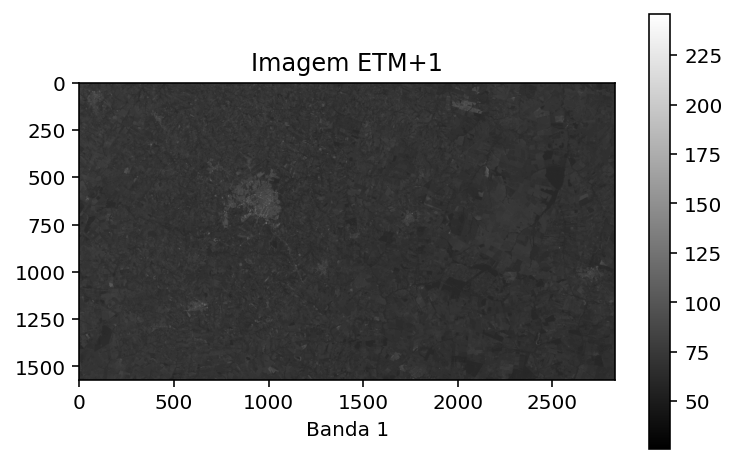

In [12]:
# %% Exibindo imagens
plt.imshow(B1,cmap='gray')
plt.xlabel('Banda 1'); 
plt.title('Imagem ETM+1', fontsize=12)
plt.colorbar();  
plt.show()

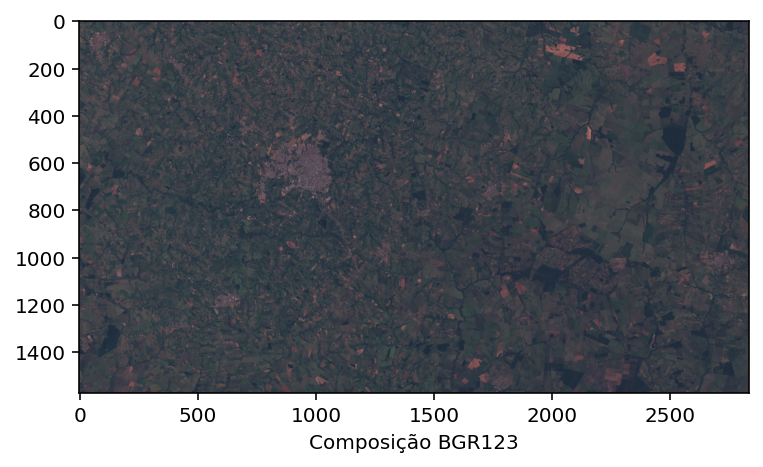

In [44]:
#%% Composição colorida e exibição
comp_BGR123 = np.stack([B3, B2, B1],axis=2)

plt.imshow(comp_BGR123,cmap='gray')
plt.xlabel('Composição BGR123'); 
#plt.axis('off')
plt.show()

## 1.5 Exibindo histograma

Plotando o histograma da banda Azul

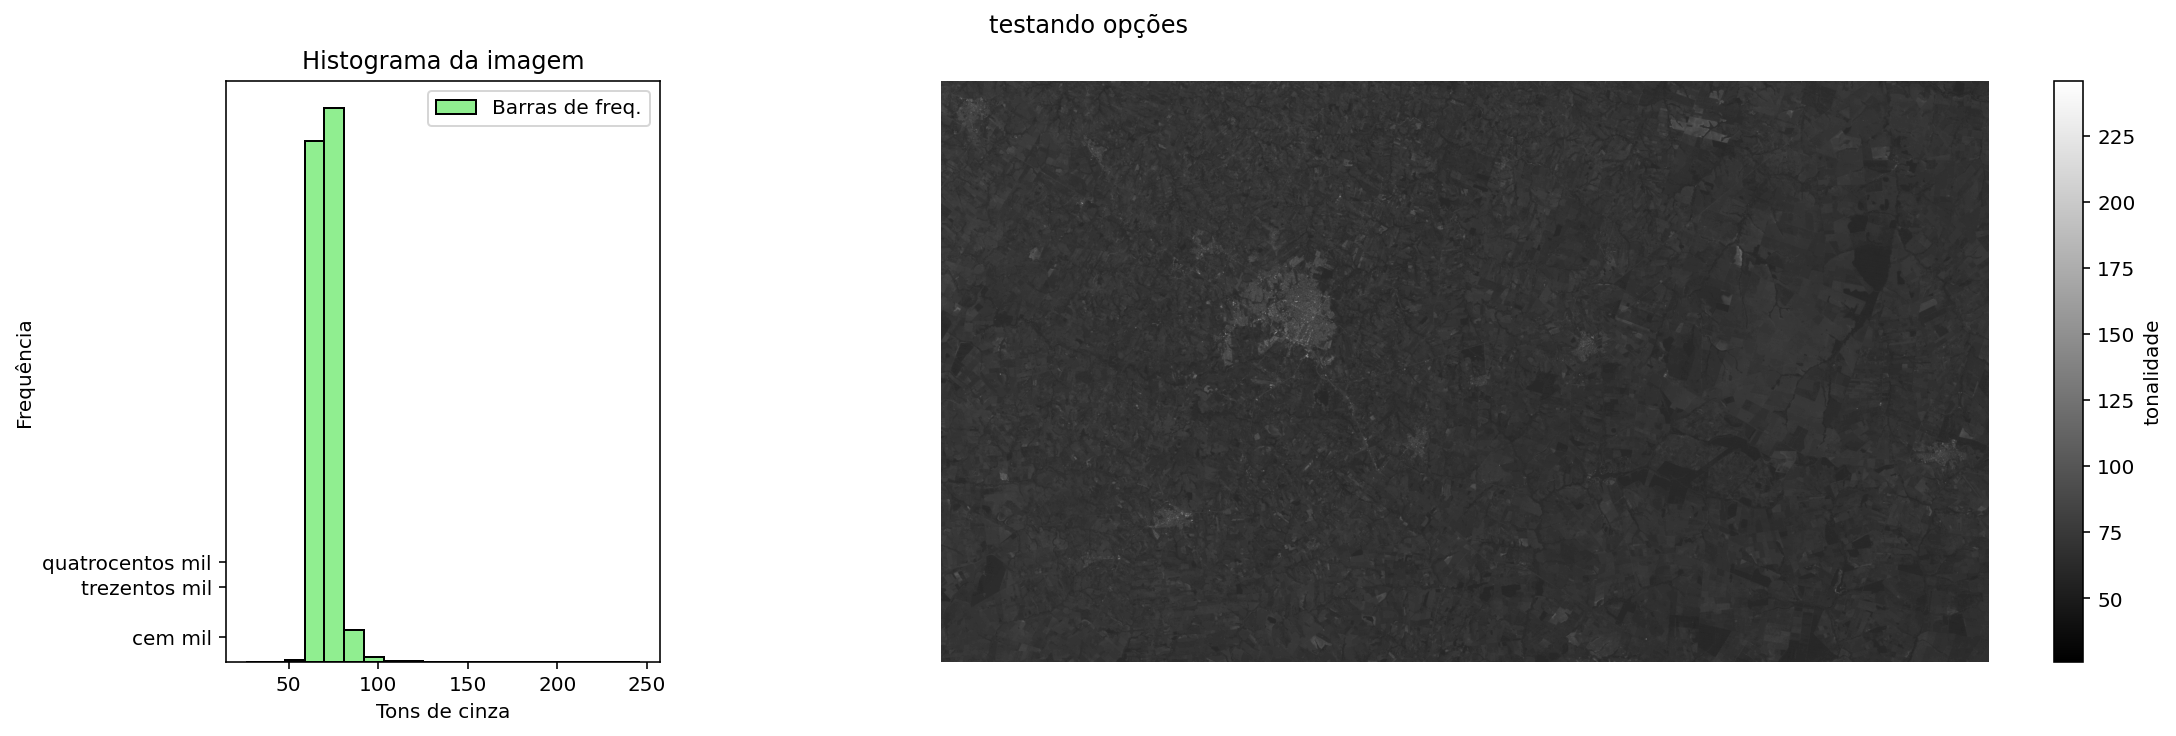

In [91]:
x = B1[np.not_equal(B1, ETM_1_arq.nodata)]
bins = 20 # melhor usar 256, mas ficará tudo preto!
color = 'lightgreen'
#plt.subplot(2, 1, 1) # (rows, columns, panel number) SE FOSSE gerar UMA FIGURA de cada vez
# usando subplots tenho uma abordagem orientada a objetos
fig, ax = plt.subplots(1,2,figsize=(15,5),
                        gridspec_kw={'width_ratios':[1,3]},
                        constrained_layout=True); 

#eu poderia deixar o fig como _ 
#constrained vai temtar deixar tudo visivel sem sobrepor
#o gridspec altera a largura relativa: estou dizendo: figura da direita terá 2x a largura da esquerda
fig.suptitle("testando opções"); 
img = ax[1].imshow(B1,cmap='gray')
ax[1].axis('off'); 
cbar = fig.colorbar(img); 
cbar.set_label('tonalidade'); 
(counts,edges,_)=ax[0].hist(x,bins,color=color,edgecolor='black',label='Barras de freq.'); 
#ax[0].set_title("Histograma da imagem",fontsize=8); 
#ax[0].set_ylabel("Frequência",fontsize=8); 
#ax[0].set_xlabel("Tons de cinza",fontsize=8); 
#Em vez de usar todos estes, eu posso fazr usando a função set!
ax[0].set_yticks([100000,300000,400000]); 
ax[0].set_yticklabels(['cem mil', 'trezentos mil', 'quatrocentos mil']); 
ax[0].set(title="Histograma da imagem",ylabel="Frequência",xlabel="Tons de cinza")
ax[0].legend(); #puxa o lable do hist()

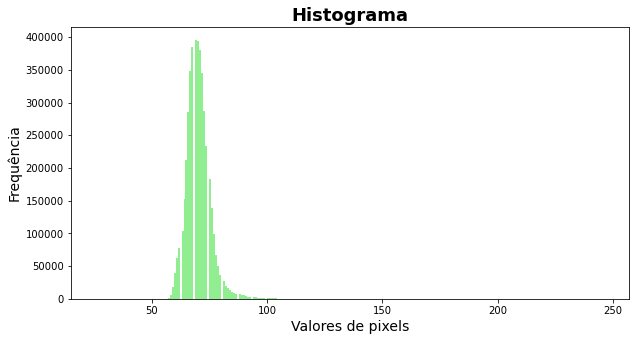

In [16]:
# Define a new figure
fig2 = plt.figure(figsize=(10,5))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("Histograma", fontsize=18, fontweight='bold')
plt.xlabel("Valores de pixels", fontsize=14)
plt.ylabel("Frequência", fontsize=14)

# let's plot non-null blue band values as an example
# For the x-axis, we want to count every pixel that has a value
x = B1[np.not_equal(B1, ETM_1_arq.nodata)]

# Define the number of bins to divide the data into
bins = 256

# Define a color for the histogram
# You can use https://matplotlib.org/2.0.0/examples/color/named_colors.html as a reference
color = 'lightgreen'

# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins,color=color)

# Save the generated figure to an external image file
fig2.savefig("histograma.png", dpi=350, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.show()

## 1.6 Reprojetando

Lembrando, o sistema de coordenadas da imagem é:

In [17]:
print(f"O istema de coordenadas é: {ETM_1_arq.crs}")

O istema de coordenadas é: EPSG:32722


In [18]:
#%% Reprojetando com rasterio
#Fazendo a reprojeção para WGS84 lat/lon
from rasterio.warp import calculate_default_transform, reproject

# definir o target CRS - rasterio suporta qualquer CRS que possa ser definido por WKT
target_crs = 'EPSG:4326'

### 1.6.1 Transformação entre sistemas

In order to translate pixel coordinates in a raster dataset into coordinates that use a spatial reference system, an affine transformation must be applied to the dataset. This transform is a matrix used to translate rows and columns of pixels into (x,y) spatial coordinate pairs. Every spatially referenced raster dataset has an affine transform that describes its pixel-to-map-coordinate transformation.

In order to reproject a raster dataset from one coordinate reference system to another, rasterio uses the transform of the dataset: this can be calculated automatically using rasterio's calculate_default_transform method:

In [19]:
# calculate a transform and new dimensions using our dataset's current CRS and dimensions
transform, width, height = calculate_default_transform(ETM_1_arq.crs, 
                                                      target_crs, 
                                                       ETM_1_arq.width, 
                                                       ETM_1_arq.height, 
                                                       *ETM_1_arq.bounds)

Usando a transformação estimada, precisamos atualizar os metadados da nova imagem. A transformação Afim faz o relacionamento entre X/Y e Lat/Lon (ou E/N).

In [20]:
# Copy the metadata from the clipped dataset
metadata = ETM_1_arq.meta.copy()

# Change the CRS, transform, and dimensions in metadata to match our desired output dataset
metadata.update({'crs':target_crs, 
                'transform':transform,
                'width':width,
                'height':height})

### 1.6.2 Reprojeção

In [21]:
with rasterio.open('ETM_1_4326.tif', 'w', **metadata) as reprojected:
            reproject(
            source        = rasterio.band(ETM_1_arq,1),
            destination   = rasterio.band(reprojected,1),
            src_transform = ETM_1_arq.transform, #transf. de origem
            src_crs       = ETM_1_arq.crs, #crs de origem
            dst_transform = transform, #transf de destino
            dst_crs       = target_crs #crs de destino
        )

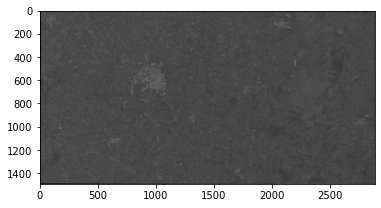

In [22]:
ETM_1_re_arq = rasterio.open('ETM_1_4326.tif')
B1_re        = ETM_1_re_arq.read(1)

plt.imshow(B1_re,cmap='gray')
#plt.xlabel('Composição BGR123'); 
#plt.axis('off')
plt.show()

In [23]:
#Checando a transformação:
#Como o arquivo é georreferenciado, vamos exibir os limites:
print(f"O bounding box do arquivo é: {ETM_1_re_arq.bounds}")

#Exibindo o sistema de coordenadas
print(f"O istema de coordenadas é: {ETM_1_re_arq.crs}")

O bounding box do arquivo é: BoundingBox(left=-51.67997632913446, bottom=-22.382276029338733, right=-50.85433205080742, top=-21.954991512077566)
O istema de coordenadas é: EPSG:4326


In [24]:
# apply the transform & metadata to perform the reprojection
# here we're saving the output to a new 'clipped_4326.tif' file
"""with rasterio.open('ETM_1_4326.tif', 'w', **metadata) as reprojected:
    for band in range(1, clipped_img.count + 1):
        reproject(
            source=rasterio.band(clipped_img, band),
            destination=rasterio.band(reprojected, band),
            src_transform=clipped_img.transform,
            src_crs=clipped_img.crs,
            dst_transform=transform,
            dst_crs=target_crs
        )"""

"with rasterio.open('ETM_1_4326.tif', 'w', **metadata) as reprojected:\n    for band in range(1, clipped_img.count + 1):\n        reproject(\n            source=rasterio.band(clipped_img, band),\n            destination=rasterio.band(reprojected, band),\n            src_transform=clipped_img.transform,\n            src_crs=clipped_img.crs,\n            dst_transform=transform,\n            dst_crs=target_crs\n        )"

## 1.7 Recortando as imagens

Ver: https://geojson.io/

In [25]:
import fiona

# use fiona to open our AOI GeoJSON
with fiona.open('AOI_PP.geojson') as f:
    aoi = [feature["geometry"] for feature in f]

In [26]:
# import rasterio's mask tool
from rasterio.mask import mask

# apply mask with crop=True to crop the resulting raster to the AOI's bounding box
#with rasterio.open('ETM_1_4326.tif') as img:
B1_clipped, transform = mask(ETM_1_re_arq, aoi, crop=True)

Usando o metadado da banda 1 reprojetada podemos criar uma nova GeoTif:

In [27]:
# use the metadata from our original mosaic
meta = ETM_1_re_arq.meta.copy()

# update metadata with new, clipped mosaic's boundaries
meta.update({"transform": transform,
    "height":B1_clipped.shape[1],
    "width":B1_clipped.shape[2]})

# write the clipped-and-cropped dataset to a new GeoTIFF
with rasterio.open('B1_re_clipped.tif', 'w', **meta) as dst:
    dst.write(B1_clipped)

Visualizando:

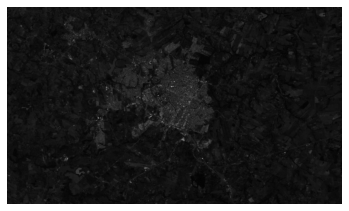

In [28]:
ETM_1_re_clip_arq = rasterio.open('B1_re_clipped.tif')
B1_re_clip    = ETM_1_re_clip_arq.read(1)
plt.imshow(B1_re_clip,cmap='gray')
#plt.xlabel('Composição BGR123'); 
plt.axis('off')
plt.show()

In [29]:
print(f"As dimensões eram: {B1.shape}")
print(f"Tipo de variável: {B1.dtype}")
print(f"Classe do dado: {type(B1)}")
print(f"Agora, são: {B1_re_clip.shape}")
print(f"Tipo de variável: {B1_re_clip.dtype}")
print(f"Classe do dado: {type(B1_re_clip)}")

As dimensões eram: (1571, 2833)
Tipo de variável: uint8
Classe do dado: <class 'numpy.ndarray'>
Agora, são: (520, 883)
Tipo de variável: uint8
Classe do dado: <class 'numpy.ndarray'>


In [30]:
"""#%% Recortando as imagens
#Para uma AOI

#Para estabalecer o bbox
aoi = [{'type': 'Polygon', 'coordinates':\
          [[(ETM_1.bounds.left, ETM_1.bounds.top),\
            (ETM_1.bounds.right-40000, ETM_1.bounds.top),\
            (ETM_1.bounds.right-40000, ETM_1.bounds.bottom),\
            (ETM_1.bounds.left, ETM_1.bounds.bottom),\
            (ETM_1.bounds.left, ETM_1.bounds.top)]]}]

ETM_1_clipped, transform = mask(ETM_1, aoi,crop=True)


print(f"O número de linhas por colunas era: {ETM_1.shape}")
print(f"Agora, é: {ETM_1_clipped.shape}")"""

'#%% Recortando as imagens\n#Para uma AOI\n\n#Para estabalecer o bbox\naoi = [{\'type\': \'Polygon\', \'coordinates\':          [[(ETM_1.bounds.left, ETM_1.bounds.top),            (ETM_1.bounds.right-40000, ETM_1.bounds.top),            (ETM_1.bounds.right-40000, ETM_1.bounds.bottom),            (ETM_1.bounds.left, ETM_1.bounds.bottom),            (ETM_1.bounds.left, ETM_1.bounds.top)]]}]\n\nETM_1_clipped, transform = mask(ETM_1, aoi,crop=True)\n\n\nprint(f"O número de linhas por colunas era: {ETM_1.shape}")\nprint(f"Agora, é: {ETM_1_clipped.shape}")'

In [31]:
"""#%% Atualizando os metadados
# Recuperando o metadado da imagem original
meta_1 = ETM_1.meta.copy()

# Atualizando
meta_1.update({"transform": transform,
    "height":ETM_1_clipped.shape[1],
    "width":ETM_1_clipped.shape[2]})

# Gravar a imagem cortada como um novo GeoTiff
with rasterio.open('ETM_1_clipped.tif', 'w', **meta_1) as dst:
    dst.write(ETM_1_clipped)

# Verificando
clipped_img = rasterio.open('ETM_1_clipped.tif')
B1_c        = clipped_img.read(1)

plt.imshow(B1_c,cmap='gray')
plt.xlabel('Banda 1'); 
plt.title('Imagem ETM+1 cortada', fontsize=18)
plt.colorbar();  
plt.show()"""

'#%% Atualizando os metadados\n# Recuperando o metadado da imagem original\nmeta_1 = ETM_1.meta.copy()\n\n# Atualizando\nmeta_1.update({"transform": transform,\n    "height":ETM_1_clipped.shape[1],\n    "width":ETM_1_clipped.shape[2]})\n\n# Gravar a imagem cortada como um novo GeoTiff\nwith rasterio.open(\'ETM_1_clipped.tif\', \'w\', **meta_1) as dst:\n    dst.write(ETM_1_clipped)\n\n# Verificando\nclipped_img = rasterio.open(\'ETM_1_clipped.tif\')\nB1_c        = clipped_img.read(1)\n\nplt.imshow(B1_c,cmap=\'gray\')\nplt.xlabel(\'Banda 1\'); \nplt.title(\'Imagem ETM+1 cortada\', fontsize=18)\nplt.colorbar();  \nplt.show()'